In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei' ##set up other language
plt.rcParams['axes.unicode_minus']= False
import matplotlib
print(matplotlib.matplotlib_fname())

/Users/chenghaolou/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


In [82]:
#import all the data and merge data
data_1 = pd.read_excel("meal_order_detail.xlsx", sheet_name = "meal_order_detail1")
data_2 = pd.read_excel("meal_order_detail.xlsx", sheet_name = "meal_order_detail2")
data_3 = pd.read_excel("meal_order_detail.xlsx", sheet_name = "meal_order_detail3")
data = pd.concat([data_1, data_2, data_3], axis = 0)
#data.head(5) check if succesfully upload the data sheet 
data.dropna(axis = 1, inplace = True) #dropna is cut off those missing data; inplace is to test if the original data been change or not
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [83]:
#avg price per dish 
#round(data["amounts"].mean(),2) # method 1--pandas
round(np.mean(data["amounts"]),2) #method 2 --numpy

44.82

白饭/大碗        323
凉拌菠菜         269
谷稻小庄         239
麻辣小龙虾        216
辣炒鱿鱼         189
芝士烩波士顿龙虾     188
五色糯米饭(七色)    187
白饭/小碗        186
香酥两吃大虾       178
焖猪手          173
Name: dishes_name, dtype: int64
0 323
1 269
2 239
3 216
4 189
5 188
6 187
7 186
8 178
9 173


/Users/chenghaolou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghaolou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39277 (\N{CJK UNIFIED IDEOGRAPH-996D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghaolou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghaolou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30871 (\N{CJK UNIFIED IDEOGRAPH-7897}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghaolou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20937 (\

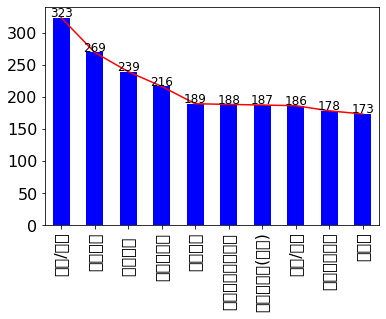

In [84]:
# which dish is the most popular
dish_count = data["dishes_name"].value_counts()[:10]
print(dish_count)
dish_count.plot(kind = "line",color = ["r"])
dish_count.plot(kind = "bar",color = ["b"],fontsize = 16)
for x,y in enumerate(dish_count):
    print(x,y)
    plt.text(x, y+2, y, ha = 'center', fontsize= 12)

Text(0, 0.5, 'oder dish')

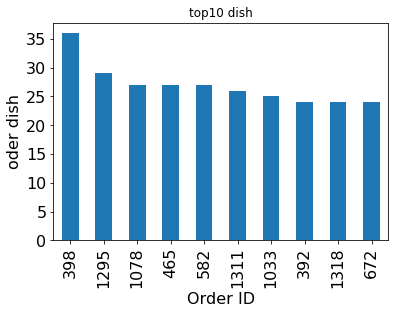

In [87]:
#which order have most popular dish
data_group = data["order_id"].value_counts()[:10]
data_group.plot(kind = "bar", fontsize = 16)
plt.title("top10 dish")
plt.xlabel("Order ID", fontsize = 16)
plt.ylabel("oder dish", fontsize = 16)
# based on Aug excel, we can see the avg for each order is 25

Text(0.5, 1.0, 'Top10 from each order ID')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


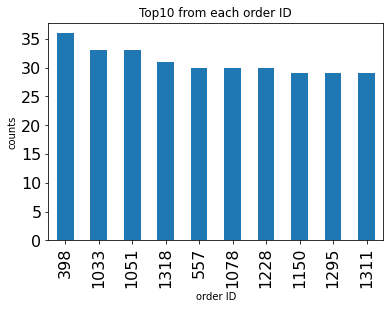

In [94]:
#top10 from each order(order_d,  count sum, sorted, top10)
data["total_amounts"] = data["counts"]* data["amounts"] #each dish total spend
dataGroup = data[["order_id","counts","amounts","total_amounts"]].groupby(by = "order_id")
Group_sum = dataGroup.sum()
sort_counts = Group_sum.sort_values(by = "counts", ascending = False)
sort_counts["counts"][:10].plot(kind = "bar", fontsize = 16)
plt.xlabel("order ID")
plt.ylabel("counts")
plt.title("Top10 from each order ID")



Text(0.5, 1.0, 'Top10 Order Spend')

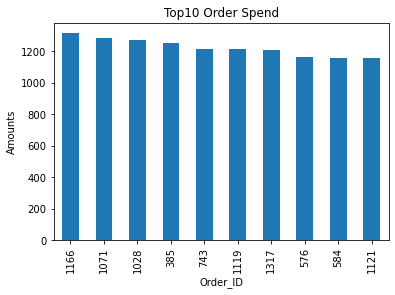

In [98]:
#sort order ascernding = False
sort_total_amounts = Group_sum.sort_values(by="total_amounts", ascending = False)
sort_total_amounts["total_amounts"][:10].plot(kind = "bar")
plt.xlabel("Order_ID")
plt.ylabel("Amounts")
plt.title("Top10 Order Spend")


Text(0.5, 1.0, 'Top10 single dish average')

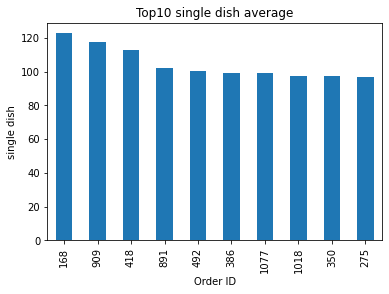

In [99]:
#which order have the most expensive spend on their order
Group_sum["average"] = Group_sum["total_amounts"]/Group_sum["counts"]
sort_average = Group_sum.sort_values(by = "average", ascending = False)
sort_average["average"][:10].plot(kind = "bar") #top 10 or mid [100:500]
plt.xlabel("Order ID")
plt.ylabel("single dish")
plt.title("Top10 single dish average")

Text(0.5, 1.0, 'counts per hour')

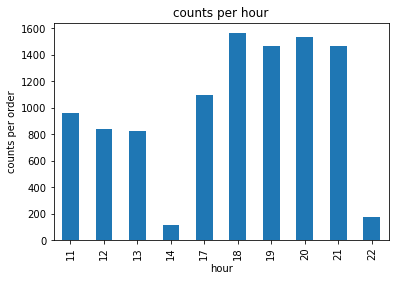

In [104]:
#which period have the most busy hour
data["hourcount"] = 1
data["time"] = pd.to_datetime(data["place_order_time"]) #switch time to date
data["hour"] = data["time"].map(lambda x:x.hour)
gp_by_hour = data.groupby(by = "hour").count()["hourcount"]
gp_by_hour.plot(kind = "bar")
plt.xlabel("hour")
plt.ylabel("counts per order")
plt.title("counts per hour")


Text(0.5, 1.0, 'counts per date')

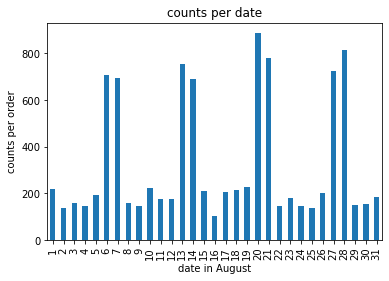

In [105]:
#which day have most order in Aug
data["daycount"] = 1
data["day"] = data["time"].map(lambda x:x.day)
gp_by_day = data.groupby(by = "day").count()["daycount"]
gp_by_day.plot(kind = "bar")
plt.xlabel("date in August")
plt.ylabel("counts per order")
plt.title("counts per date")


Text(0.5, 1.0, 'counts per week')

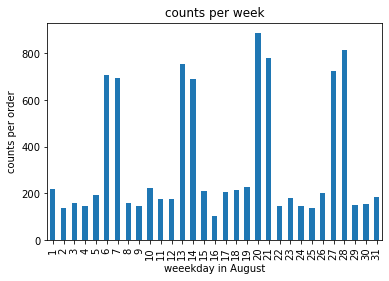

In [110]:
#check which day in a week is the most busy day
data["weekcount"] = 1
data["weekday"] = data["time"].map(lambda x:x.weekday())
gp_by_weekday = data.groupby(by = "weekday").count()["weekcount"]
gp_by_day.plot(kind = "bar")
plt.xlabel("weeekday in August")
plt.ylabel("counts per order")
plt.title("counts per week")

